In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CropRecomm/Crop_recommendation.csv')

In [96]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,5


In [4]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [7]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
from sklearn import preprocessing

In [9]:
label_encoder = preprocessing.LabelEncoder()

In [10]:
df['label_encoded'] = label_encoder.fit_transform(df['label'])

In [11]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [12]:
df['label_encoded'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

<Axes: xlabel='label_encoded', ylabel='count'>

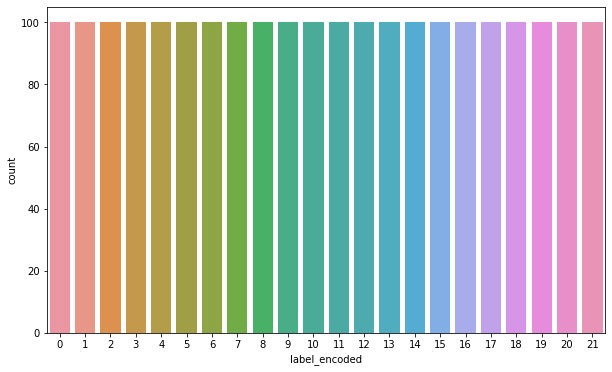

In [13]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'label_encoded', data = df)

In [14]:
df.drop(['label'], axis = 1).head()

,N,P,K,temperature,humidity,ph,rainfall,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [15]:
new_df = df.drop(['label'], axis = 1)

<Axes: >

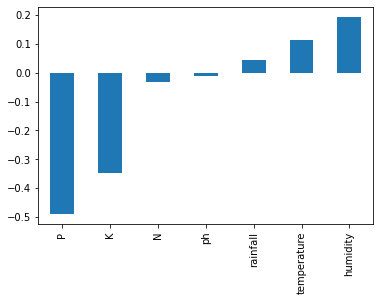

In [16]:
new_df.corr()['label_encoded'][ : -1].sort_values().plot(kind = 'bar')

<Axes: >

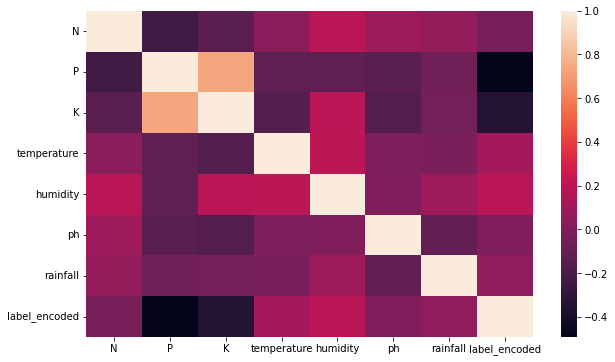

In [17]:
plt.figure(figsize = (10, 6))
sns.heatmap(new_df.corr())

In [18]:
X = new_df.drop('label_encoded', axis = 1)
y = df['label_encoded']

In [19]:
from sklearn.model_selection import train_test_split 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [137]:
from pickle import dump
dump(scaler, open('scaler.pkl', 'wb'))

In [116]:
scaler.data_max_

array([140.        , 145.        , 205.        ,  43.67549305,
        99.98187601,   9.93509073, 298.5601175 ])

In [117]:
scaler.data_min_

array([ 0.        ,  5.        ,  5.        ,  8.82567475, 14.27327988,
        3.50475231, 20.36001144])

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
X_train.shape

(1540, 7)

In [26]:
earlyStop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)

In [27]:
model = Sequential()

model.add(Dense(64, activation = 'relu'))

model.add(Dense(32, activation = 'relu'))

model.add(Dense(22, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam')

In [28]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test), callbacks = [earlyStop])

Epoch 1/600
49/49 [==============================] - 2s 10ms/step - loss: 3.0395 - val_loss: 2.9755
Epoch 2/600
49/49 [==============================] - 0s 4ms/step - loss: 2.8671 - val_loss: 2.7733
Epoch 3/600
49/49 [==============================] - 0s 3ms/step - loss: 2.5891 - val_loss: 2.4444
Epoch 4/600
49/49 [==============================] - 0s 3ms/step - loss: 2.2030 - val_loss: 2.0287
Epoch 5/600
49/49 [==============================] - 0s 4ms/step - loss: 1.7932 - val_loss: 1.6775
Epoch 6/600
49/49 [==============================] - 0s 4ms/step - loss: 1.4521 - val_loss: 1.3613
Epoch 7/600
49/49 [==============================] - 0s 5ms/step - loss: 1.1925 - val_loss: 1.1303
Epoch 8/600
49/49 [==============================] - 0s 4ms/step - loss: 1.0101 - val_loss: 0.9760
Epoch 9/600
49/49 [==============================] - 0s 4ms/step - loss: 0.8763 - val_loss: 0.8656
Epoch 10/600
49/49 [==============================] - 0s 4ms/step - loss: 0.7737 - val_loss: 0.7665
Epoch 11

In [29]:
from keras.models import load_model
model.save('CropRecommend.h5')

In [30]:
losses = pd.DataFrame(model.history.history)

In [31]:
losses

,loss,val_loss
0,3.039456,2.975533
1,2.867071,2.773322
2,2.589062,2.444403
3,2.202966,2.028703
4,1.793210,1.677548
...,...,...
118,0.038179,0.071694
119,0.040738,0.079294
120,0.035310,0.073930
121,0.045141,0.067905


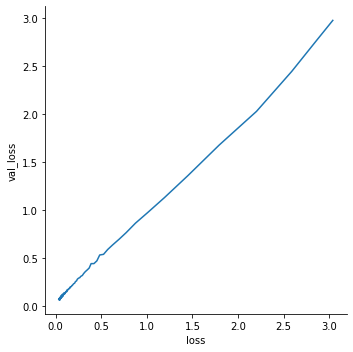

In [32]:
sns.relplot(x = losses['loss'], y = losses['val_loss'], kind = 'line')

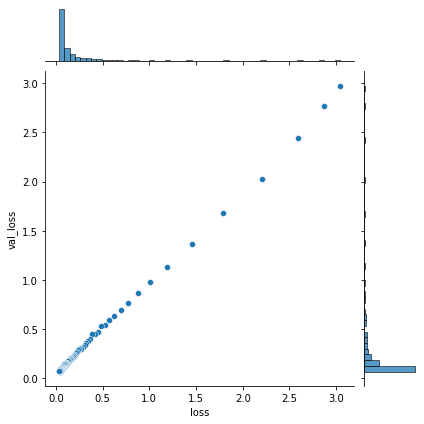

In [33]:
sns.jointplot(x = 'loss', y = 'val_loss', data = losses)

<Axes: >

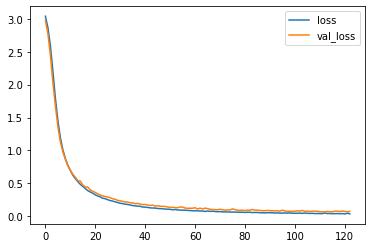

In [34]:
losses.plot()

In [35]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

21/21 [==============================] - 0s 1ms/step


In [36]:
from sklearn.metrics import classification_report, confusion_matrix 

In [37]:
new_predictions = np.argmax(predictions, axis=1)

In [38]:
new_predictions

array([15, 21, 17, 17,  0, 12,  0, 13, 14, 10,  2,  4, 19,  8,  4, 19,  0,
        6, 17, 15,  5, 17, 16, 17,  3,  8, 14, 16, 18, 20, 19, 10,  8, 10,
        8,  2,  8,  3,  3,  9, 17, 12,  2, 11, 14, 11, 18,  4, 15, 11,  2,
        5,  7, 14,  5,  9,  6,  0,  1, 10, 21,  4, 10, 16, 17,  2, 16, 20,
       15, 18, 15,  4,  8,  1,  2, 17,  1,  6, 21, 16,  5,  3,  8, 13, 16,
       12,  5, 13,  2, 19, 11, 13,  6, 17, 18, 13,  9,  5,  2, 10,  4,  8,
       16, 15, 21,  9, 21,  1, 18, 13,  1,  8,  6, 19, 18,  3, 11,  4, 19,
       20, 18,  7,  2,  4,  3,  2,  4, 11,  1, 13,  1,  9, 19,  3,  4, 16,
       18,  1,  1,  0,  9, 15, 14, 13,  4, 11,  0,  4,  9, 13, 14, 10, 21,
       14, 18, 18, 18,  9, 11,  8,  3,  0, 16,  6, 20,  4,  7, 10, 21,  7,
        7,  2, 19,  3,  4, 11, 10,  7, 21,  8,  5,  5,  9,  8, 13,  9,  1,
        9,  4, 17, 17, 14, 12, 19, 21,  9, 11,  0,  2,  3,  7,  7,  1,  6,
       20, 19, 14,  1,  8, 14, 11,  3,  3,  3,  0, 20,  9, 17,  5,  2,  9,
       12, 12,  4, 17,  0

In [39]:
y_test

1451    15
1334    21
1761    17
1735    17
1576     0
        ..
398      9
584     13
1702    17
292      3
1344    21
Name: label_encoded, Length: 660, dtype: int32

In [40]:
print(classification_report(y_test, new_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26
           2       0.96      0.92      0.94        26
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        33
           5       0.97      1.00      0.98        30
           6       0.97      1.00      0.98        28
           7       1.00      1.00      1.00        23
           8       0.79      0.91      0.85        34
           9       0.97      1.00      0.99        36
          10       0.81      0.95      0.88        22
          11       1.00      0.96      0.98        26
          12       1.00      1.00      1.00        32
          13       0.97      0.91      0.94        34
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        25
          17       0.97    

In [41]:
print(confusion_matrix(y_test, new_predictions))

[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 31  0  0  0  0  0  0  0  0  1  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 21  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  3  0  0 31  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [80]:
from keras.models import load_model
model_final = load_model('CropRecommend.h5')

In [97]:
helper = {
        0 : 'Apple',
        1 : 'Banana',
        2 : 'Blackgram',
        3 : 'Chickpea',
        4 : 'Coconut',
        5 : 'Coffee',
        6 : 'Cotton',
        7 : 'Grapes',
        8 : 'Jute',
        9 : 'KidneyBeans',
        10 : 'Lentil',
        11 : 'Maize',
        12 : 'Mango',
        13 : 'Mothbeans',
        14 : 'Mungbean',
        15 : 'Muskmelon',
        16 : 'Orange',
        17 : 'Papaya',
        18 : 'Pigeonpeas',
        19 : 'Pomegranate',
        20 : 'Rice',
        21 : 'Watermelon',
}

In [132]:
# from sklearn.preprocessing import MinMaxScaler
def predicter(data):
    # scaler = MinMaxScaler()
    # data = data.reshape(-1, 7)
    scaledData = scaler.transform(data)
    predictedData = (model.predict(scaledData) > 0.5).astype("int32")
    output = np.argmax(predictedData, axis=1)
    if int(output) in helper:
        print(helper[int(output)])
    else:
        print("Error! Enter valid inputs!")

In [133]:
data = np.array([[90, 42, 43, 20.879744, 82.002744, 6.502985, 202.935536]])
predicter(data)

1/1 [==============================] - 0s 24ms/step
Rice


c:\Users\subhr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [134]:
data = np.array([[104, 18, 30, 23.603016, 60.396475, 6.779833, 140.937041]])
predicter(data)

1/1 [==============================] - 0s 41ms/step
Coffee


c:\Users\subhr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
